<a href="https://colab.research.google.com/github/EmmanuelADAM/IntelligenceArtificiellePython/blob/master/TPMLGymQLearning-Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning
## Appliqué à [Gym.OpenAI](https://gym.openai.com)

---
## Présentation de Gym

Voir la page d'introduction à [Gym](https://gym.openai.com).

### Installation de gym

#### Outil AUTRE QUE COLAB (pyzo, jupyter lab, .....)

In [ ]:
!pip install gym

In [1]:
import gym

---
## Test de ML par Q-Learning pour atteindre l'objectif
- Utiliser l'environnement `FrozenLake8x8-v0` (un labyrinthe en mode texte)
- 4 actions sont possibles (Left(0), Down(1), Right(2), Up(3))
  - l'adjectif "Frozen" signifie qu'une *action n'est pas déterministe !*
    - à partir d'une case "gelée", aller à droite peut .. mener à droite, ou pas
    - => intérêt du Q-Learning adapté à ce type d'environnement probabiliste
- Le labyrinthe est ainsi composé de zones glacées, de puits, et d'un objectif

En vous basant sur les codes présent dans l'article [Q-Learning en Java](http://emmanuel.adam.free.fr/site/spip.php?article134), programmer un algo de Q-Learning pour apprendre à atteindre l'objectif 

**N.B.** 
  - *Cet environnement fonctionne bien sous colab, jupyterlab.. quelques soucis de l'affichage de l'état courant (carré rouge) sous Pyzo....* 
  - Il est fortement conseillé de débuter avec un environnement déterministe pour évaluer la bonne marche de l'algo de Q-Learning que vous aurez développer..
    - pour cela, lancer l'environnement avec 

---
#### Etude de l'environnement

In [2]:
env = gym.make('FrozenLake-v0') # tester FrozenLake8x8 pour l'environnement plus large
print(env.spec)
print(env.action_space) #ici 4 actions discrétisée
print(env.observation_space) # ici 4x4 cellules possibles

env.reset()
env.render()
print("S = Start, G = Goal, H = Hole, F = Frozen place")

EnvSpec(FrozenLake-v0)
Discrete(4)
Discrete(16)

SFFF
FHFH
FFFH
HFFG
S = Start, G = Goal, H = Hole, F = Frozen place


---
#### Test des actions

In [3]:
###### Test des fonctions
env.reset()
action = 0
observation, reward, done, info = env.step(action)
env.render()
print("pos° actuelle:", observation,",gain:", reward,",fini:", done,",", info)

  (Left)
SFFF
FHFH
FFFH
HFFG
pos° actuelle: 4 ,gain: 0.0 ,fini: False , {'prob': 0.3333333333333333}


In [4]:
env.reset()
action = 1
observation, reward, done, info = env.step(action)
env.render()
print("pos° actuelle:", observation,",gain:", reward,",fini:", done,",", info)

  (Down)
SFFF
FHFH
FFFH
HFFG
pos° actuelle: 1 ,gain: 0.0 ,fini: False , {'prob': 0.3333333333333333}


In [5]:
env.reset()
action = 2
observation, reward, done, info = env.step(action)
env.render()
print("pos° actuelle:", observation,",gain:", reward,",fini:", done,",", info)

  (Right)
SFFF
FHFH
FFFH
HFFG
pos° actuelle: 0 ,gain: 0.0 ,fini: False , {'prob': 0.3333333333333333}


In [6]:
env.reset()
action = 3
observation, reward, done, info = env.step(action)
env.render()
print("pos° actuelle:", observation,",gain:", reward,",fini:", done,",", info)

  (Up)
SFFF
FHFH
FFFH
HFFG
pos° actuelle: 0 ,gain: 0.0 ,fini: False , {'prob': 0.3333333333333333}


In [7]:
#note : 
## observation = position où se trouve l'agent
## reward = recompense
## done = but atteint
## info = proba de reussite de l'action

On est clairement ici dans un environnement non déterministe (une même action à partir d'un même état ne mène pas toujours au même résultat); c'est le contexte de prédilection de l'algo de Q-Learning...

---
### <font color="red">Mise en place de l'environnement en mode déterministe</font>
Important, pour valider l'apprentissage de votre algorithme avant de passer en mode non-déterministe, il vaut mieux le tester sur un environnement où chaque action à 100% de réussite. Ci-dessous un exemple sur le mini labyrinthe.

In [8]:
env = gym.make('FrozenLake-v0', is_slippery=False)
env.reset()
action = 2
observation, reward, done, info = env.step(action)
env.render()
print("pos° actuelle:", observation,",gain:", reward,",fini:", done,",", info)
action = 2
observation, reward, done, info = env.step(action)
env.render()
print("pos° actuelle:", observation,",gain:", reward,",fini:", done,",", info)
action = 1
observation, reward, done, info = env.step(action)
env.render()
print("pos° actuelle:", observation,",gain:", reward,",fini:", done,",", info)
action = 1
observation, reward, done, info = env.step(action)
env.render()
print("pos° actuelle:", observation,",gain:", reward,",fini:", done,",", info)
action = 1
observation, reward, done, info = env.step(action)
env.render()
print("pos° actuelle:", observation,",gain:", reward,",fini:", done,",", info)
action = 2
observation, reward, done, info = env.step(action)
env.render()
print("pos° actuelle:", observation,",gain:", reward,",fini:", done,",", info)


  (Right)
SFFF
FHFH
FFFH
HFFG
pos° actuelle: 1 ,gain: 0.0 ,fini: False , {'prob': 1.0}
  (Right)
SFFF
FHFH
FFFH
HFFG
pos° actuelle: 2 ,gain: 0.0 ,fini: False , {'prob': 1.0}
  (Down)
SFFF
FHFH
FFFH
HFFG
pos° actuelle: 6 ,gain: 0.0 ,fini: False , {'prob': 1.0}
  (Down)
SFFF
FHFH
FFFH
HFFG
pos° actuelle: 10 ,gain: 0.0 ,fini: False , {'prob': 1.0}
  (Down)
SFFF
FHFH
FFFH
HFFG
pos° actuelle: 14 ,gain: 0.0 ,fini: False , {'prob': 1.0}
  (Right)
SFFF
FHFH
FFFH
HFFG
pos° actuelle: 15 ,gain: 1.0 ,fini: True , {'prob': 1.0}


---
## Exemple de solution
### en mode non déterministe


In [9]:
import numpy as np

env = gym.make('FrozenLake8x8-v0', is_slippery=True)
actions = {0:'Gauche', 1:'Bas', 2:'Droite', 3:'Haut'}

# initialiser la Q-Table
# autant de case que l'environnement en possede, 
# contanant autant de valeurs que d'actions possibles
Q = np.zeros([env.observation_space.n,env.action_space.n])


### Mise en place des paramètres
Pour rappel l'algo de Q Learning simple repose sur cette équation : 
$Q(s,a) \gets \lambda \times (r + \gamma \times max_{a'}(Q(s', a'))) + (1-\lambda ) \times Q(s,a)$ avec 
  - $\lambda$ : coef d'apprentissage
  - $\gamma$ : coef de réduction
  - $r$ : récompense

In [10]:
lambda_learn = .8
gamma = 0.99
nb_episodes = 50000

- L'algo va tout d'abord tatonner, choisir des actions aléatoirement, modifier la valeur de l'action choisie en fonction de son résultat en espérant atteindre l'objectif au bout d'un certain nombre de tests.
- Il va recommencer quelques milliers de fois, en tatonnant de moins en moins et en prenant de plus en plus en considération la valeur des actions afin de les choisir

In [11]:
# Q étant la table des actions par case
# Q[2,:] retourne le tableau des valeurs des actions de la case 2
# np.argmax(Q[2,:]) retourne le no de l'action ayant la plus grande utilité
# np.random.randn(1,env.action_space.n) retourne un tableau de 4 valeurs entre 0 et 1
np.random.randn(1,env.action_space.n)

array([[ 0.00788014, -0.46340962, -1.83357718,  1.50470343]])

In [12]:
#np.argmax(Q[2,:]+np.random.randn(1,env.action_space.n)) 
#    retourne l'action ayant la plus grande utilité après ajout de bruit
np.argmax(Q[2,:]+np.random.randn(1,env.action_space.n))

1

In [13]:
# L'idée est alors d'ajouter de moins en moins de bruit au fur et à mesure des tests

## L'algorithme de Q-Learning simple

In [14]:
##algorithme de Q-Learning simple
def Qlearn(epoch):
    """
    effectue un cycle d'apprentissage/recherche de solution' via le Q-Learning simple

    Parameters
    ----------
    epoch : no de l'etape

    Returns
    -------
    total_r : recompense totale
    r : recompense du dernier etat rencontre
    states_list : liste des etats traverses
    actions_list : liste des actions effectuees
    """
    s = env.reset()
    total_reward = 0
    done = False
    step = 0
    # liste des etats
    states_list = []
    # liste des actions
    actions_list = []
    # The Q-Table learning algorithm
    while not done and step < 25:
        step += 1
        # Choix d'une action avec bruitage de moins en moins marque
        a = np.argmax(Q[s, :] + np.random.randn(1, env.action_space.n) * (5. / (epoch + 1)))

        # recuperer un nouvel etat, sa recompense et son etat
        new_state, r, done, _ = env.step(a)

        # bouger coute de l'energie
        if r != 1: r = r - 0.001

        # Q-Learning
        Q[s, a] = Q[s, a] + lambda_learn * (r + gamma * np.max(Q[new_state, :]) - Q[s, a])
        s = new_state
        total_reward = total_reward + r
        states_list.append(s)
        actions_list.append(a)
    return total_reward, r, states_list, actions_list

In [15]:
def try_qlearn():
    """
    lance nb_episodes fois un cycle de Q-Learning et memorise chaque solution trouvee

    Returns
    -------
    solutions_list : liste des solutions (no, recompense totale, liste des etats, liste des actions)
    """
    solutions_list = []
    # liste des etats
    states_list = []
    # liste des actions
    actions_list=[]
    for i in range(nb_episodes):
        # Reset environment and get first new observation
        total_reward, r, states_list, actions_list = Qlearn(i)
        #memoriser si succes        
        if r==1 :
            solutions_list.append((i, total_reward, states_list, actions_list))
    #derniere solution trouvee : 
    print("derniere solution trouvee : ")
    print("--> etape no : ", solutions_list[-1][0])
    print("--> valeur : ", solutions_list[-1][1])
    print("--> nb actions : ", len(solutions_list[-1][2]))
    print("--> les actions : ", end="")
    for a in solutions_list[-1][3]:
        print(actions[a], end=", ")
    print()
    return solutions_list


In [16]:
solutions = try_qlearn()

derniere solution trouvee : 
--> etape no :  49667
--> valeur :  0.976
--> nb actions :  25
--> les actions : Bas, Droite, Droite, Droite, Bas, Droite, Droite, Droite, Bas, Bas, Bas, Bas, Bas, Gauche, Bas, Gauche, Bas, Droite, Droite, Droite, Droite, Droite, Droite, Droite, Droite, 


## Affichage de l'environnement
Affichons maintenant la liste des actions via l'environnement Gym

In [17]:
def rendu(states_list, actions_list):
    """ affiche la liste des etats rencontres et les actions qui les ont causes
    par le rendu de gym
    Parameters
    ----------
    states_list : liste des etats
    actions_list : liste des actions

    Returns
    -------
    None.
    """
    env.reset()
    env.render()
    for i in range(0, len(states_list)):
        env.env.s = states_list[i]
        print("action ", actions[actions_list[i]])
        env.render()

In [18]:
print("rendu des actions, rappel le terrain est glissant....")
rendu(solutions[-1][ 2], solutions[-1][ 3])

rendu des actions, rappel le terrain est glissant....

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
action  Bas

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
action  Droite

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
action  Droite

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
action  Droite

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
action  Bas

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
action  Droite

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
action  Droite

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
action  Droite

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
action  Bas

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
action  Bas

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
actio

Traçons une courbe pour évaluer la progression de l'apprentissage entre chaque test

In [19]:
import matplotlib.pyplot as plt

def plot_qlearn(solutions_list):
    """
    dessine l'evolution des recompenses des solutions trouvees
    Parameters
    ----------
    solutions_list : liste des solutions
    """
    xs = [x[0] for x in solutions_list]
    ys = [y[1] for y in solutions_list]
    plt.figure(figsize=(10, 4))
    plt.plot(xs, ys, '.')
    plt.show()



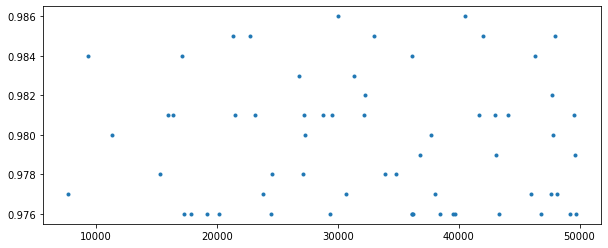

In [20]:
plot_qlearn(solutions)

Les points sont de plus en plus rapprochés mais toujours disparates, ce ne serait le cas si l'environnement n'était stochastique.

Tentez en modifiant plus haut le chargement de l'environnement : 

`env = gym.make('FrozenLake8x8-v0', is_slippery=False)`



Tentez aussi d'implémenter le ***double Q Learning*** pour étudier le gain...